# Visualizing your data - Your data has a story to tell... how to get the story out

* Intro
  * Python visualization landscape
  * Imperative vs. declarative visualizations
* Some common visualization problems and what to do... 
  * Visualizing high dimension data
  * Visualizing big data (lots of instances)
  * Interactive and iterative data exploration
* Narrate your story

## Sidebar: This Presentation

* Due to some of the dependencies in this presentation, a seperate docker file is required.
    * Don't follow along by opening `Presentation.ipynb`
* The presentation is available as a `reveal.js` HTML presentation
    * Use `Presentation.slides.html` if you'd like to follow along 
    * The slides were generated from Jupyter (see `docker/viz/convert.sh` for deatils.
* Exercises for this presentation are available in seperate notebooks that will work with the docker container we've been using

![Me](./resources/boss.gif "Pointy Haired Boss")

![Expectations](./resources/expecting.jpg "Expectations")

## Python's Visualization Landscape

![There's an app for that](./resources/app_for_that.png "There's an app for that")


![Landscape](./resources/origional_visualization_landscape.png "Python Visualization Landscape")

** [Jake Vanderplas Presentation @ PyCon 2017](https://www.youtube.com/watch?v=FytuB8nFHPQ&feature=youtu.be)

## A little bit of history

**Matplotlib**: 
 * Essentially the first plotting library, been around for 10+ years
 * Powerful, but API is verbose and not terribly expressive (Imperative)
 * Initial intent, and current strength, produce print production quality plots
 * A number of tools have grown up around matplotlib to leverage it's strengths while providing a more user-friendly API
 * Does **not** do well on large data sets
 
**Bokeh**:
  * Takes python plotting "off of the printed page", for an interactive, web experience
  * Been around for 5+ years
  * Has both an imperative and a declarative API
  * Preliminary vector output support
  * Does **not** do well on large data sets

## Imperative vs. Declarative Visualization

**Imperative**:
  * Specify *HOW* something should be done
  * Manually specify plotting steps
  * Specification and execution are often intertwined
  
**Declarative**:
  * Specify *WHAT* should be done
  * Details are determined automatically
  * Seperates specification from execution

We'll explore what this looks like by comparing several plotting styles for a very simple use case:

[Iris Data Set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
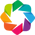

In [1]:
# import the data-sciencey packages
import pandas as pd
import numpy as np
from sklearn import datasets

# import and initialize the plotting packages we'll use 
# to compare Imperative vs. Declarative plotting
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
import holoviews as hv
hv.extension('matplotlib')
hv.extension('bokeh')

In [2]:
def sklearn_to_df(sklearn_dataset, target_name_column=None):
    '''
    Function to convert sklearn dataset in to pandas data frame
    :param sklearn_dataset: the dataset loaded from sklearn
    :param target_name_column: name to assign dataframe column to translate 
    target value to target name if desired. Defaults to None -> no conversion 
    :return: pandas dataframe
    '''
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    if target_name_column and 'target_names' in sklearn_dataset:
        df[target_name_column] = df['target'].apply(
            lambda row: sklearn_dataset.target_names[row])
    return df

# load the iris dataset
iris = sklearn_to_df(datasets.load_iris(), 'species')
iris.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa

### matplotlib

* Define a plot (including Title, axis)
* Group the various species together 
* Iterate through the groupings, select the color we want, and scatter plot all of the points in the grouping
* explicitely interrogate the data to define a color map for points that will be plotted
* Finally define the legend after the points are plotted, otherwise the legend won't display properly

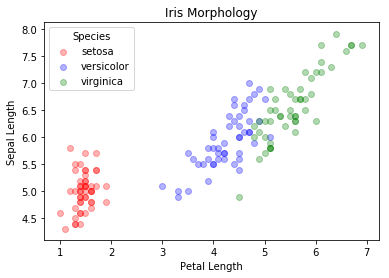

In [3]:
color_map = dict(zip(iris.species.unique(), 
                    ['red', 'blue', 'green']))
# ugh: this is kind of brittle... What happens if in the future
# a new species is added to the data set???

plt.title('Iris Morphology')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')

for species, group in iris.groupby('species'):
    plt.scatter(group['petal length (cm)'], group['sepal length (cm)'],
               color=color_map[species],
               alpha=0.3, edgecolor=None,
               label=species)

plt.legend(frameon=True, title='Species')


### bokeh

Similar to matplotlib, but additionally, we have to tell bokeh to format output for display in notebook and also to show the plot

In [4]:
p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Sepal Length'
p.plot_height = 300
p.plot_width = 400

for species, group in iris.groupby('species'):
    p.circle(group['petal length (cm)'], group['sepal length (cm)'],
             color=color_map[species], 
             fill_alpha=0.2, size=5, 
             legend=species)

p.legend.location = 'top_left'
output_notebook()
show(p)

Loading BokehJS ...

These have all been very imperative. Let's try something more declarative. How about pandas `plot` function?

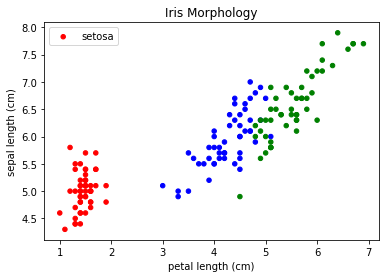

In [5]:
# we still have to be imperative about defining the colors for each x,y point
ax = iris.plot(kind='scatter', x='petal length (cm)', y='sepal length (cm)', 
               c=iris.species.apply(lambda row: color_map[row]),
               title='Iris Morphology')

# we still have to be imperative about defining the legend
ax.legend(iris.species.unique())

# not sure why we don't see all species in legend ?!?

We can do better! 

**Enter Holoviews**

## Holoviews
* Part of the PyViz toolset:

![PyViz](./resources/PyViz.png "PyViz Family")



![PyViz](./resources/landscape_hv_nx_pyviz.png "PyViz")

## Holoviews Philosophy

Stop plotting your data - annotate your data and let it visualize itself!

[Philosophy](https://github.com/ioam/ioam.github.com/wiki/HoloViews:-Philosophy)

> HoloViews re-establishes the connection between the data and its visual representation ... By supplying metadata about the semantics of your data, the visualization comes for free, transparently and in the background.

> HoloViews helps you understand your data better, by letting you work seamlessly with both the data and its graphical representation.

To annotate our data, we'll start by identifying our key dimensions (x axis, or widgets, in some cases the independent variables) and our value dimensions (y axis, or other visualization techniques, color, size, etc., in some cases the dependent variables).

In [6]:
kdims = ['petal length (cm)']
vdims = ['sepal length (cm)', 'species']

Remember with Declaritive plotting, I'm focusing on telling the library **WHAT** I want rather than telling it **HOW** to do it.

What do I want?

* Scatter plot with between petal length and sepal length
* Points colored based on species
* A legend in the top left of the plot

Oh, and for kicks, I'd like a hover tool so I can see the precise details when I hover over a point...

## Sidebar: Customizing Plots in Holoviews

Option Spec: `path {normalization options} [plotting options] (style options)`

Options may be applied via:

  * `%%opts` cell magic: applies to cell only
  * `%opts` cell magic: applies globally
  * `.options` method: applies to object only

In [7]:
# First we tell Holoviews that I want a scatter plot, for my data (iris), 
# letting it know what should be used for kdims and vdims 
scatter = hv.Scatter(iris, kdims, vdims)
type(scatter)

holoviews.element.chart.Scatter

In [8]:
%opts Scatter [color_index='species' tools=['hover'] legend_position='top_left' width=400 height=300 ] (cmap='Set1' size=4)
# Now we tell holoviews we'd like to color the data based on species and
# using the colormap 'Set1'. We also like a legend and a hover tool

# finally, we ask jupyter to render the plot
scatter

:Scatter   [petal length (cm)]   (sepal length (cm),species)

![hover](./resources/hover.png "Hover Tool")

## Consider for a minute how we might plot all of the columns

We'd have 5 dimensions...

1. Species
2. Petal length
3. Petal width
4. Sepal length
5. Sepal width

![question](./resources/question.jpeg "Question")

## Execise 1

1. Open your `Exercise1.ipynb` notebook 
2. run all cells
3. add your solution to the *Exercise 1 - Your Solution* cell and re-run that cell

Hint: 

While you are free to using matplotlib, bokeh, holoviews (or any other plotting library/method), I'd recommend using holoviews. You can get an idea of the types of plots that are available by looking at the Holoviews Gallery.

Hint:

If you use Holoviews, different backends are required base on plot style

:Scatter3D   [petal length (cm)]   (sepal length (cm),sepal width (cm),petal width (cm),species)
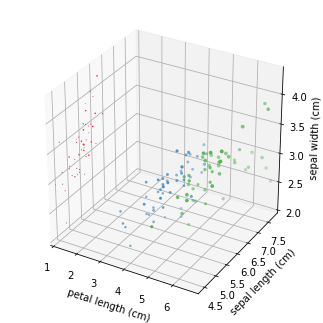

In [9]:
%%output backend='matplotlib'
%%opts Scatter3D [color_index='species' size_index='petal width (cm)'] (cmap='Set1')

# include the rest of the dimensions we are interested in exploring
vdims = ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)', 'species']

hv.Scatter3D(iris, kdims, vdims)

# Common Visualization Problems

* What do I do if my dataset has too many instances? 
* What do I do if my dataset has too many dimensions?
* How do I iterate to better understand my data?

### The Problem of too many instances

* Overplotting
* Saturation
* Crashing the Browser

(A more comprehensive list of these problems and their remedies at [Plotting Pitfalls](http://datashader.org/user_guide/1_Plotting_Pitfalls.html)

Let's look at an example:

**NYC Taxi Data Set**
* 11,842,094 Taxi Trips
* Pickup and Drop off location (in Web Mercator coordinates)
* Fare and tip amount
* Pickup and Drop Off date/time

In [10]:
import dask.dataframe as dd

df = dd.read_parquet('../pyviz-examples/data/nyc_taxi_wide.parq').persist()
df.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2015-01-15 19:05:39   2015-01-15 19:23:42                1           1.59   
1  2015-01-10 20:33:38   2015-01-10 20:53:28                1           3.30   
2  2015-01-10 20:33:38   2015-01-10 20:43:41                1           1.80   
3  2015-01-10 20:33:39   2015-01-10 20:35:31                1           0.50   
4  2015-01-10 20:33:39   2015-01-10 20:52:58                1           3.00   

    pickup_x   pickup_y  dropoff_x  dropoff_y  fare_amount  tip_amount  \
0 -8236963.0  4975552.5 -8234835.5  4975627.0         12.0        3.25   
1 -8237826.0  4971752.5 -8237020.5  4976875.0         14.5        2.00   
2 -8233561.5  4983296.5 -8232279.0  4986477.0          9.5        0.00   
3 -8238654.0  4970221.0 -8238124.0  4971127.0          3.5        0.00   
4 -8234433.5  4977363.0 -8238107.5  4974457.0         15.0        0.00   

   dropoff_hour  pickup_hour  
0            19           19  
1            20           20  
2            20           20  
3            20           20  
4            20           20

11M data points are far too many for the browser to handle. Things start getting pretty sluggish around 50K. We'll downsample to just the first 10K points to illustrate a few things

In [11]:
df_sample = df.head(10000)

Let's plot the pickup x,y coordinates and see if anything interesting emerges...

:Points   [pickup_x,pickup_y]   (tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,dropoff_x,dropoff_y,fare_amount,tip_amount,dropoff_hour,pickup_hour)
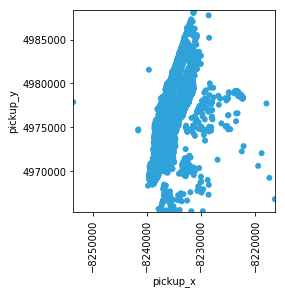

In [12]:
%%output backend='matplotlib'
%opts Points [xrotation=90]
dims = ['pickup_x', 'pickup_y']
points = hv.Points(df_sample, dims)
points

Not much to see here even with just 10,000 points. This is due to overplotting... We can try to address it by using transparency...

:Points   [pickup_x,pickup_y]   (tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,dropoff_x,dropoff_y,fare_amount,tip_amount,dropoff_hour,pickup_hour)
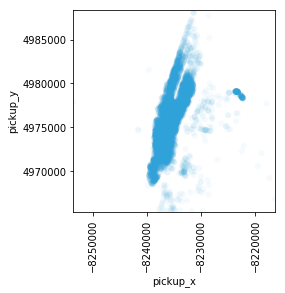

In [13]:
%%output backend='matplotlib'
%opts Points [xrotation=90] (alpha=0.05)
points

That helped a bit, but we still aren't seeing much due to the shear number of points. In fact with the transparency, we've lost some data. 

Another approach would be to down sample further. By doing so we run the risk of sampling out significant portions of the distribution and can easily miss what the data is trying to tell us.

Another approach is to aggregate to a degree appropriate to the 'zoom' level. The DataShader library provides just this functionality. We'll use DataShader as well as some other features of the PyViz suite to explore this data in more detail.

In [14]:
from holoviews.operation.datashader import datashade
import cartopy.crs as crs
from geoviews.tile_sources import EsriImagery

In [15]:
%opts WMTS [width=700 height=600 bgcolor='black' xaxis=None yaxis=None show_grid=False]
tiles = EsriImagery.clone(crs=crs.GOOGLE_MERCATOR)
tiles

:WMTS   [Longitude,Latitude]

We'll use Holoviews composition to overlay our points on top of geography to provide further context. Holoviews has two types of composition `*` for overlay `+` for layout (side by side)

In [16]:
tiles * points

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [pickup_x,pickup_y]   (tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,dropoff_x,dropoff_y,fare_amount,tip_amount,dropoff_hour,pickup_hour)

With 10,000 points and some additional context, you see some of the underlying structure emerge, e.g. Central Park, Airport, etc. But now let's incorporate the full 11M instances. We'll use datashader which will aggregate the underlying data into a plot the matches the zoom level automatically

In [17]:
points = hv.Points(df, dims)
ds = datashade(points, width=1000, height=600, x_sampling=0.5, y_sampling=0.5)
tiles * ds

:DynamicMap   []
   :Overlay
      .WMTS.I :WMTS   [Longitude,Latitude]
      .RGB.I  :RGB   [pickup_x,pickup_y]   (R,G,B,A)

## Exercies 2

1. Open your `Exercise2.ipynb` notebook 
2. run all cells
3. add your solution to the the last two cells and re-run


### The Problem of too many dimensions

Most of use can really only visualize 3 dimensions (perhaps 4 or 5 if we use color, shape, size and animation in addition to geometry). For an interesting discussion of comprehending/visualizing higher dimensions watch the 3 Blue 1 Brown presentation [Thinking visually about higher dimensions](https://www.youtube.com/watch?v=zwAD6dRSVyI).

There are a number of approaches to consider for reducing dimensions while maintaining the "integrity" of the data for the purpose of visualization.

Often these tools are used either as an initial step to better understand your data or in unsupervised machine learning use cases.


### Dimension Reduction Approaches

**PCA** (Principal Component Analysis) - Keep the dimensions that provide the most variance in the given dimension

  While PCA is useful in a number of analytic situation, it generally isn't very good for visualziation. PCA preserves distances between dissimilar points. Because of this, the local structure we'd hope to see in visualizaiton is lost.


**SNE** (Stochastic Neighbor Embedding) - Pair-wise Euclidean distances between points are converted into a probability density. Points are embedded into a lower dimensional space attempting to match the probability density

  SNE provides a means for reducing dimension while preserving the local structure that is interesting for visualization.
  
  
**UMAP** (Uniform Manifold Approximation and Projection) - What the cool kids are using...

  Similar to SNE but does a better job of preserving global structure as well as doing a good job of preserving local structure. Written using `Numba` which you may remember from our `Cython` presentation.

### MNIST
![MNIST](./resources/mnist.png "MNIST Digits")

### PCA Visualization

![PCA](./resources/mnist.pca.png "PCA")

### t-SNE Visualization

![tsne](./resources/mnist.full.tsnemp.png  "t-SNE")

### UMAP

![UMAP](./resources/mnist.full.umap.png "UMAP")

### Performance Considerations

| Implementation  | Execution Time (s) | Max Memory (kb) | Cumulative CPU % |
| --------------- | ------------------ | --------------- | ---------------- |
| pypi            | 2100.58            | 1426288         |   99             |
| proofpoint-labs |  329.98            | 1436172         | 3588             |
| umap            |  102.73            | 2127828         |  243             |
| tsne-cuda       |   22.59            | 2456588         |  123             |

\* In this table, all implementations are t-SNE aside from umap


### Exercise 3

1. Open your `Exercise3.ipynb` notebook 
2. run all cells
3. add your solution to the last 2 cells and re-run those cells and answer the questions


### How do I iterate to better understand my data

Let's look back at the Holoviews Philosophy:

> HoloViews re-establishes the connection between the data and its visual representation ... By supplying metadata about the semantics of your data, the visualization comes for free, transparently and in the background.

> HoloViews helps you understand your data better, by letting you work seamlessly with both the data and its graphical representation.


`scatter` holds all of the data from the Iris data set... Recall that it's type is `holoviews.element.chart.Scatter`

Holoview objects, in general, are light weight wrappers around data object (Pandas or Dask Dataframes, etc.) that hold the annotations necessary to allow the underlying plotting library to do the "right" thing.

Let's look at the `data` member of `scatter`

In [18]:
scatter.data is iris

True

This paradigm allows us to seperate data and plotting operations entirely, and have the visualization update appropriately as we iteratively work with the underlying data.

It may not be evident, but this is a **very** powerful feature, particularly when combined with Jupyter.

Let's go back to our iris example. Recall what it looks like

In [19]:
scatter

:Scatter   [petal length (cm)]   (sepal length (cm),species)

In [20]:
# Now, let's modify the data in place. We'll just add a centimeter to the 
# petal length, not a valid thing to do, but it illustrates the point
iris.loc[(iris['species'] == 'virginica'), 'petal length (cm)'] += 1

In [21]:
scatter

:Scatter   [petal length (cm)]   (sepal length (cm),species)

## The power of iteration

![Workflow](./resources/viz_workflow.png "Visualization Workflow")

### Exercise 4

1. Open your `Exercise4.ipynb` notebook 
2. run all cells
3. add your solution to the last 2 cells and re-run those cells

Hint: 

Use what you've learned from the numpy and pandas sessions. This shouldn't be a lot of code...

### How to introduce interactivity into your visualizations?

We've already seen how switching from `matplotlib` to `bokeh` introduces some interactivity (select, zoom, pan, etc.). We've also seen how Holoviews can simply add additional interactivity with the hover tool and linked composition.

We'll explore a few additional ways to add interactivity...

Use Case: Explore taxi pickup data around LaGuardia Airport 

In [22]:
# LaGuardia is bounded by the following corners:
lga_x1 = -8224023.83
lga_x2 = -8223158.54
lga_y1 = 4978583.57
lga_y2 = 4979176.40

df_lga = df.loc[
    (df['pickup_x'] > lga_x1) & (df['pickup_x'] < lga_x2) &
    (df['pickup_y'] > lga_y1) & (df['pickup_y'] < lga_y2)
                      ]
len(df_lga)

122434

In [24]:
%%output size=50
ds = hv.Dataset(df_lga.head(10000), kdims=[
    'pickup_x', 'pickup_y', 'passenger_count', 'pickup_hour'
])
tiles * ds.to(hv.Points, kdims=['pickup_x', 'pickup_y'])

:HoloMap   [passenger_count,pickup_hour]
   :Overlay
      .WMTS.I   :WMTS   [Longitude,Latitude]
      .Points.I :Points   [pickup_x,pickup_y]   (tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,dropoff_x,dropoff_y,fare_amount,tip_amount,dropoff_hour)

## Narrate your story

**Jupyter**: Platform for literate computing
  * Literate Programming was introduced by Donald Knuth in the 70's. The focus being not on telling the computer what you want it to do, rather on telling other people what you want the computer to do. Desired outcome is Insight rather than numbers
  * Supports interactive, exploratory computing
  * Facilitates reproducible (data) science
  
**Docker**: Light-weight virtualization
  * Defines compute environment fully
  * Also allows for packaging data together with compute environment
  * Enables others to view/validate/challenge your results easily

## Conclusion

Your data has a story to tell. PyViz, Jupyter, Docker and the rest of the Python ecosystem help lead your data from source, through exploration to narration to insight.

![Results](./resources/hopefully_delivered.jpg "Results?")

## Questions?

# References

* [Visualization High Dimension Data](https://www.youtube.com/watch?v=aStvaXMhGGs)
* [Uniform Manifold Approximation and Project for dimension reduction](https://www.youtube.com/watch?v=nq6iPZVUxZU)
* [Python Visualization Landscape](https://www.youtube.com/watch?v=FytuB8nFHPQ)
* [PyViz Tutorial (written)](http://pyviz.org/tutorial/index.html) (about 500 hours worth of tutorials)
* [PyViz Tutorial ("live")](https://www.youtube.com/watch?v=aZ1G_Q7ovmc) (3.5 hours worth of tutorial)
* [Thinking viusally about higher dimensions](https://www.youtube.com/watch?v=zwAD6dRSVyI)
* [PyViz: Dashboards for Visualizing 1 Billion Datapoints in 30 Lines of Python](https://www.youtube.com/watch?v=k27MJJLJNT4)
* [Datashader: Revealing the Structure of Genuiinely Big Data](https://www.youtube.com/watch?v=6m3CFbKmK_c)
* [Holoviews: Building Complex Visualizations Easily for Reproducible Science](https://www.youtube.com/watch?v=hNsR2H7Lrg0)
* [Exploratory Data Visualization with Vega, Vega-Lite, and Altair](https://www.youtube.com/watch?v=ms29ZPUKxbU)
* [The Grammar of Graphics](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448)
* [Vega-Lite: A Grammar of Interactive Graphics](https://www.youtube.com/watch?v=Nsrz4YdaZ_A)